In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Veri setini yüklüyorum ve verilerimizin her bir kolonuna anlamlı isimler veriyorum, kafamızda netleşmesi için
dosya_yolu = 'veri-seti.txt'
data = pd.read_csv(dosya_yolu, delimiter="\t", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Kontrol için ilk 10 veriyi göstermesini sağlıyoruz..
#"Outcome" sütunu, kişinin diyabet hastası olup olmadığını gösteriyor. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.
ilk_on_veriyi_göster = data.head(10)
ilk_on_veriyi_göster

# Veri normalizasyonu, makine öğrenimi ve veri analizi süreçlerinde genellikle veri ölçeklerinin standartlaştırılması için kullanılır.
# İki popüler normalizasyon yöntemi vardır, Min-Max ölçekleme ve Z-Skoru normalizasyonu (Standartlaştırma).
# Min-Max ölçekleme yöntemini kullanarak veri setinizdeki tüm sayısal sütunları normalizasyon işleminden geçireceğim.
# Bu işlemi gerçekleştirmek için MinMaxScaler fonksiyonunu sklearn.preprocessing kütüphanesinden kullanacağız.

# Normalizasyon için scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sayısal sütunları seçme ve ölçekleme
scaled_data = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Ölçeklenmiş verileri DataFrame'e dönüştürme ve başlıkları atama
scaled_df = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Outcome sütununu sonuca ekleyerek tam bir DataFrame oluşturma
scaled_df['Outcome'] = data['Outcome']
# İlk 10 ölçeklenmiş veriyi gösterme
scaled_df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1


Boyut indirgeme, özellikle yüksek boyutlu veri kümelerinde verilerin görselleştirilmesi ve modelleme süreçlerinin basitleştirilmesi için kullanılır.
İki popüler yöntem olan PCA (Principal Component Analysis) ve LDA (Linear Discriminant Analysis) bu amaçla kullanılır.
Bu adımda, her iki yöntemi de kullanarak veri setinizde boyut indirgeme yapacağız.

PCA (Principal Component Analysis) PCA, veri setindeki varyansı maksimize eden yönde yeni özellikler (ana bileşenler) oluşturur.
Yüksek korelasyona sahip özelliklerin etkisini azaltarak verilerin özünü korur.

LDA (Linear Discriminant Analysis) LDA ise sınıflar arası ayrımı maksimize etmeyi amaçlar.
Sınıflandırma problemleri için tercih edilen bir yöntemdir ve sınıflar arasındaki mesafeyi maksimize ederek boyut indirger.

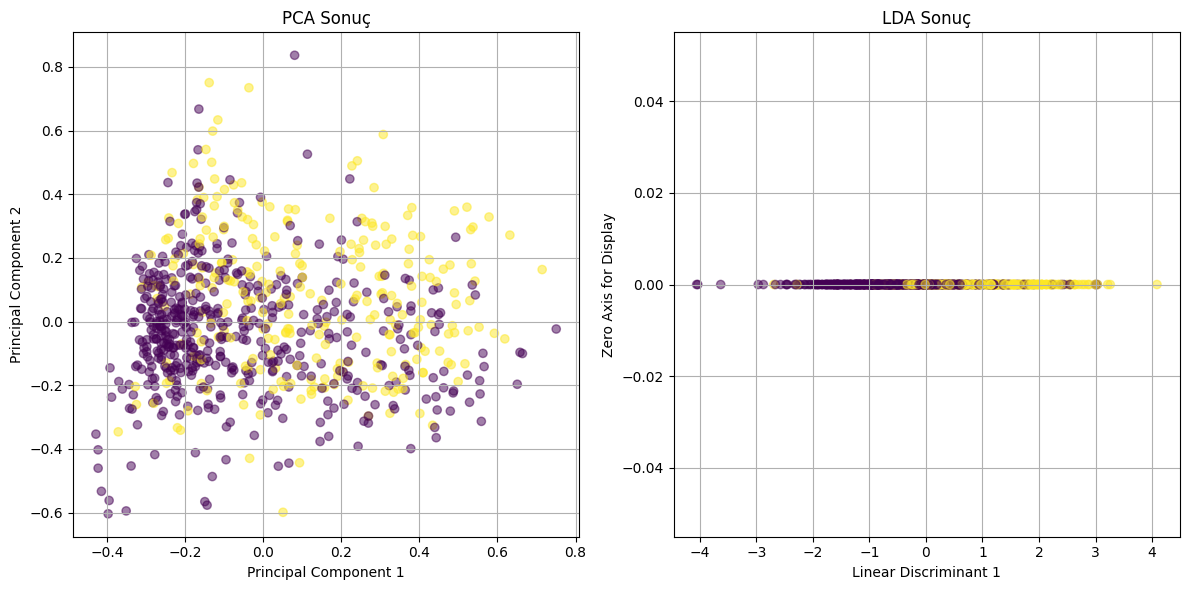

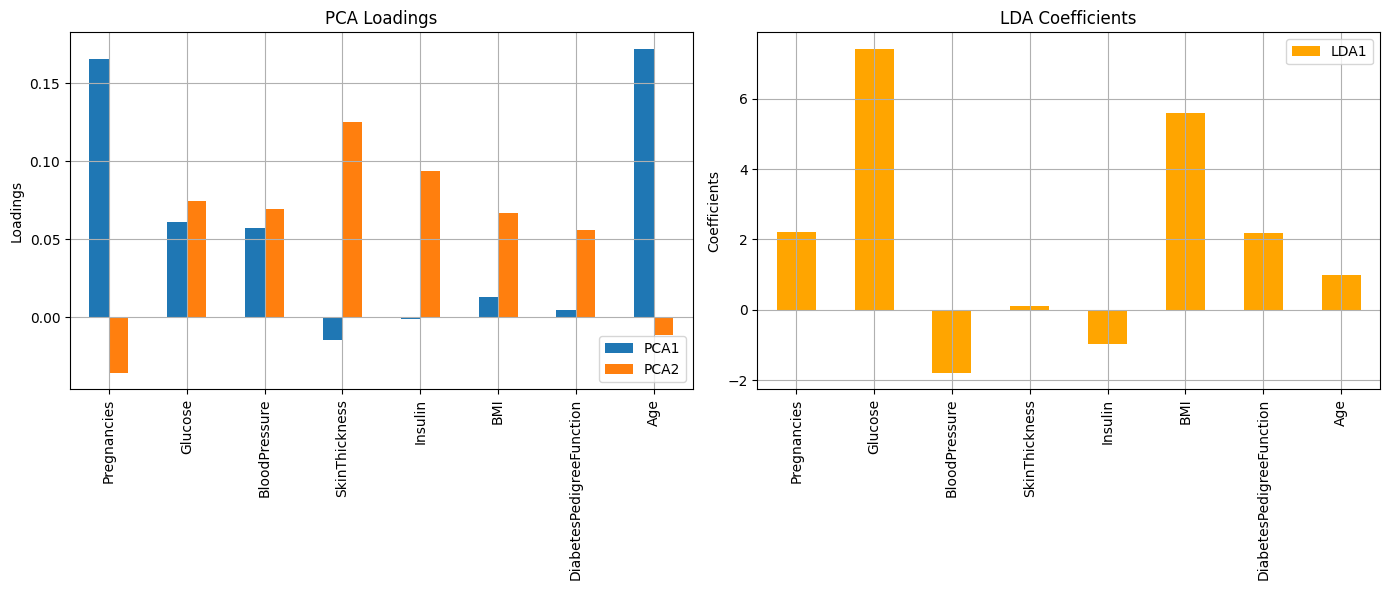

(                              PCA1      PCA2
 Pregnancies               0.165698 -0.035462
 Glucose                   0.061335  0.074719
 BloodPressure             0.057219  0.069331
 SkinThickness            -0.014211  0.125274
 Insulin                  -0.000982  0.093694
 BMI                       0.013221  0.066899
 DiabetesPedigreeFunction  0.004866  0.056023
 Age                       0.172291 -0.011369,
                               LDA1
 Pregnancies               2.205743
 Glucose                   7.423436
 BloodPressure            -1.792569
 SkinThickness             0.096389
 Insulin                  -0.962367
 BMI                       5.599547
 DiabetesPedigreeFunction  2.172778
 Age                       0.991046)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Veri setini yüklüyorum ve verilerimizin her bir kolonuna anlamlı isimler veriyorum, kafamızda netleşmesi için
dosya_yolu = 'veri-seti.txt'
data = pd.read_csv(dosya_yolu, delimiter="\t", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Kontrol için ilk 10 veriyi göstermesini sağlıyoruz..
#"Outcome" sütunu, kişinin diyabet hastası olup olmadığını gösteriyor. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.
ilk_on_veriyi_göster = data.head(10)
ilk_on_veriyi_göster

# Veri normalizasyonu, makine öğrenimi ve veri analizi süreçlerinde genellikle veri ölçeklerinin standartlaştırılması için kullanılır.
# İki popüler normalizasyon yöntemi vardır, Min-Max ölçekleme ve Z-Skoru normalizasyonu (Standartlaştırma).
# Min-Max ölçekleme yöntemini kullanarak veri setinizdeki tüm sayısal sütunları normalizasyon işleminden geçireceğim.
# Bu işlemi gerçekleştirmek için MinMaxScaler fonksiyonunu sklearn.preprocessing kütüphanesinden kullanacağız.

# Normalizasyon için scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sayısal sütunları seçme ve ölçekleme
scaled_data = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Ölçeklenmiş verileri DataFrame'e dönüştürme ve başlıkları atama
scaled_df = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Outcome sütununu sonuca ekleyerek tam bir DataFrame oluşturma
scaled_df['Outcome'] = data['Outcome']
# İlk 10 ölçeklenmiş veriyi gösterme
scaled_df.head(10)

# PCA modelini başlatma ve ilk iki ana bileşeni hesaplama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df.drop('Outcome', axis=1))

# LDA modelini başlatma ve tek ayrımcı bileşeni hesaplama
lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = lda.fit_transform(scaled_df.drop('Outcome', axis=1), scaled_df['Outcome'])

# PCA ve LDA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
lda_df = pd.DataFrame(lda_data, columns=['LDA1'])

# Grafikleri çizme
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# PCA sonuçlarının grafiği
axes[0].scatter(pca_df['PCA1'], pca_df['PCA2'], c=scaled_df['Outcome'], cmap='viridis', alpha=0.5)
axes[0].set_title('PCA Sonuç')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# LDA sonuçlarının grafiği (Tek boyut olduğu için LDA1 ile sadece bir boyut gösterebiliriz)
axes[1].scatter(lda_df['LDA1'], [0] * len(lda_df), c=scaled_df['Outcome'], cmap='viridis', alpha=0.5)
axes[1].set_title('LDA Sonuç')
axes[1].set_xlabel('Linear Discriminant 1')
axes[1].set_ylabel('Zero Axis for Display')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# PCA'nın öz değerleri
pca_eigenvalues = pca.explained_variance_
# LDA'nın öz değeri
lda_eigenvalue = lda.explained_variance_ratio_
(pca_eigenvalues, lda_eigenvalue)

# PCA ve LDA sonuçlarını daha anlamlı hale getirmek için hangi özniteliklerin bu iki yöntem için en ayırt edici olduğunu belirlemek önemlidir.
# Bu, her iki yöntemin yükleme skorlarını (PCA) ve katsayılarını (LDA) inceleyerek yapılabilir.

# PCA yüklerini (loadings) hesaplama
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# LDA katsayılarını hesaplama
lda_coefficients = lda.coef_

# PCA yüklerini ve LDA katsayılarını DataFrame'e dönüştürme
feature_names = scaled_df.drop('Outcome', axis=1).columns
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PCA1', 'PCA2'], index=feature_names)
lda_coefficients_df = pd.DataFrame(lda_coefficients.T, columns=['LDA1'], index=feature_names)

# PCA ve LDA yüklerini grafik üzerinde gösterme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA yükleri grafiği
pca_loadings_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('PCA Loadings')
axes[0].set_ylabel('Loadings')
axes[0].grid(True)

# LDA katsayıları grafiği
lda_coefficients_df.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('LDA Coefficients')
axes[1].set_ylabel('Coefficients')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# PCA ve LDA özelliklerinin etkinliği
pca_loadings_df, lda_coefficients_df


PCA Loadings
Pregnancies ve Age özelliklerinin PCA1 üzerinde diğerlerine göre daha yüksek katkıları var, bu da bu iki özelliğin ilk ana bileşeni oluşturmada önemli rol oynadığını gösteriyor.
SkinThickness ve Insulin özellikleri, PCA2 üzerinde daha yüksek katkılar sağlıyor, dolayısıyla bu bileşenin oluşumunda bu özellikler önemli.
LDA Coefficients
Glucose ve BMI özelliklerinin çok yüksek katsayılara sahip olduğunu görüyoruz, bu da bu özelliklerin sınıfları ayırmada önemli olduğunu gösterir.
BloodPressure ve Insulin gibi özelliklerin negatif katsayılara sahip olması, bu özelliklerin sınıflandırma sırasında ters yönde etkili olduğunu gösterir.
Bu sonuçlar, özellik seçimi ve model oluşturma süreçlerinde hangi özelliklerin dikkate alınması gerektiği konusunda önemli bilgiler sağlar.
Özellikle LDA katsayıları, hangi özelliklerin diyabet tanısında daha belirleyici olduğunu göstermektedir.

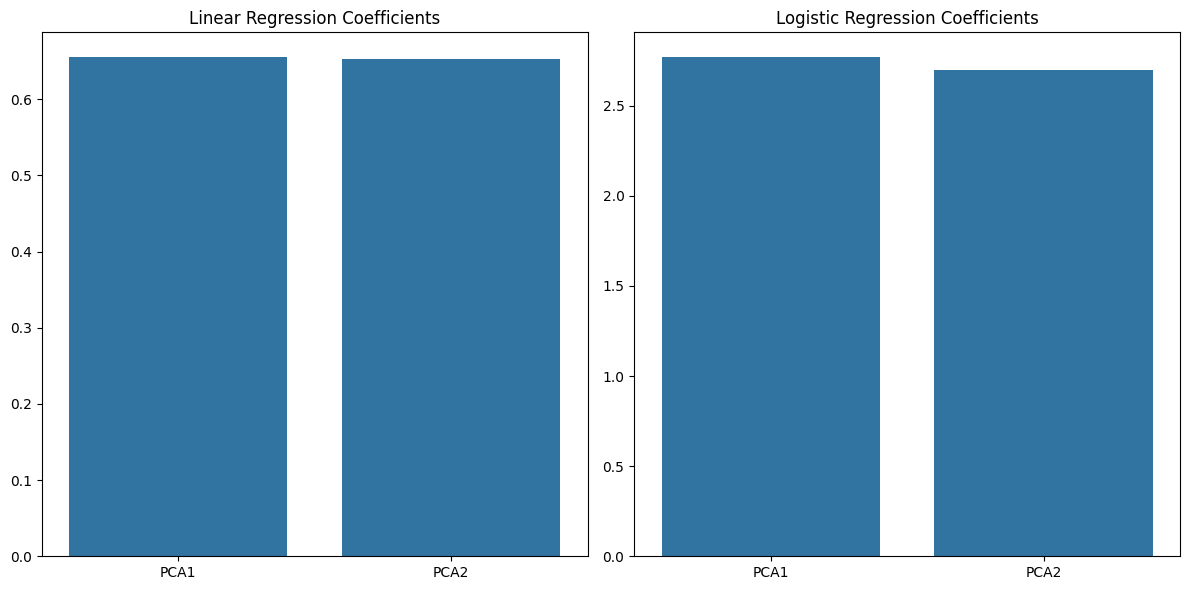

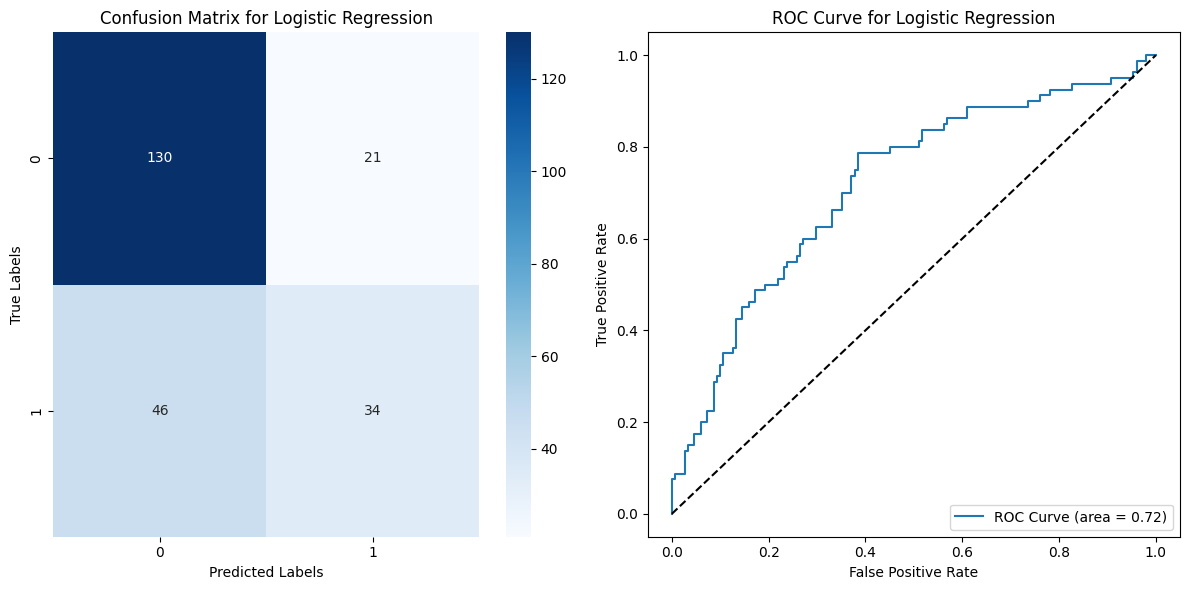

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       151
           1       0.62      0.42      0.50        80

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns


# Veri setini yüklüyorum ve verilerimizin her bir kolonuna anlamlı isimler veriyorum, kafamızda netleşmesi için
dosya_yolu = 'veri-seti.txt'
data = pd.read_csv(dosya_yolu, delimiter="\t", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Kontrol için ilk 10 veriyi göstermesini sağlıyoruz..
#"Outcome" sütunu, kişinin diyabet hastası olup olmadığını gösteriyor. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.
ilk_on_veriyi_göster = data.head(10)
ilk_on_veriyi_göster

# Veri normalizasyonu, makine öğrenimi ve veri analizi süreçlerinde genellikle veri ölçeklerinin standartlaştırılması için kullanılır.
# İki popüler normalizasyon yöntemi vardır, Min-Max ölçekleme ve Z-Skoru normalizasyonu (Standartlaştırma).
# Min-Max ölçekleme yöntemini kullanarak veri setinizdeki tüm sayısal sütunları normalizasyon işleminden geçireceğim.
# Bu işlemi gerçekleştirmek için MinMaxScaler fonksiyonunu sklearn.preprocessing kütüphanesinden kullanacağız.

# Normalizasyon için scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sayısal sütunları seçme ve ölçekleme
scaled_data = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Ölçeklenmiş verileri DataFrame'e dönüştürme ve başlıkları atama
scaled_df = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Outcome sütununu sonuca ekleyerek tam bir DataFrame oluşturma
scaled_df['Outcome'] = data['Outcome']
# İlk 10 ölçeklenmiş veriyi gösterme
scaled_df.head(10)

# PCA modelini başlatma ve ilk iki ana bileşeni hesaplama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df.drop('Outcome', axis=1))

# LDA modelini başlatma ve tek ayrımcı bileşeni hesaplama
lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = lda.fit_transform(scaled_df.drop('Outcome', axis=1), scaled_df['Outcome'])

# PCA ve LDA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
lda_df = pd.DataFrame(lda_data, columns=['LDA1'])

# PCA'nın öz değerleri
pca_eigenvalues = pca.explained_variance_
# LDA'nın öz değeri
lda_eigenvalue = lda.explained_variance_ratio_
(pca_eigenvalues, lda_eigenvalue)

# PCA ve LDA sonuçlarını daha anlamlı hale getirmek için hangi özniteliklerin bu iki yöntem için en ayırt edici olduğunu belirlemek önemlidir.
# Bu, her iki yöntemin yükleme skorlarını (PCA) ve katsayılarını (LDA) inceleyerek yapılabilir.

# PCA yüklerini (loadings) hesaplama
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# LDA katsayılarını hesaplama
lda_coefficients = lda.coef_

# PCA yüklerini ve LDA katsayılarını DataFrame'e dönüştürme
feature_names = scaled_df.drop('Outcome', axis=1).columns
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PCA1', 'PCA2'], index=feature_names)
lda_coefficients_df = pd.DataFrame(lda_coefficients.T, columns=['LDA1'], index=feature_names)

# PCA ve LDA özelliklerinin etkinliği
pca_loadings_df, lda_coefficients_df

# Daha önce hesaplanan PCA modelini kullanarak özellik matrisini transforme etme
pca_transformed_features = pca.transform(scaled_df.drop('Outcome', axis=1))

# Transforme edilmiş özellikleri DataFrame'e dönüştürme
pca_features_df = pd.DataFrame(pca_transformed_features, columns=['PCA1', 'PCA2'])

# Transforme edilmiş özellik matrisinin ilk 10 satırını gösterme
pca_features_df.head(10)

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    pca_features_df, scaled_df['Outcome'], test_size=0.30, random_state=42)

# Çoklu Doğrusal Regresyon, bağımlı değişkenin bir veya birden fazla bağımsız değişkenle ilişkisini modellemek için kullanılır.
#Ancak, bizim durumumuzda bağımlı değişken kategorik (Outcome), bu yüzden Lojistik Regresyon daha uygun olacaktır
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Multinominal Lojistik Regresyon modeli kurma
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

# Regresyon katsayılarını raporlama
linear_coefficients = linear_model.coef_
logistic_coefficients = logistic_model.coef_[0]

# Test kümesi için tahminler yapma
y_pred_linear = linear_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplama
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_logistic)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logistic)

# Sonuçları görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Katsayılar grafiği
sns.barplot(x=['PCA1', 'PCA2'], y=linear_coefficients, ax=ax[0])
ax[0].set_title('Linear Regression Coefficients')

sns.barplot(x=['PCA1', 'PCA2'], y=logistic_coefficients, ax=ax[1])
ax[1].set_title('Logistic Regression Coefficients')

plt.tight_layout()
plt.show()

# Konfuzyon matrisi ve ROC eğrisi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix for Logistic Regression')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

ax[1].plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc_log:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_title('ROC Curve for Logistic Regression')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Metrik raporu
print(report_logistic)




Regresyon Katsayıları ve Grafikler
1. Lineer Regresyon Katsayıları:
PCA1: Pozitif katsayı
PCA2: Pozitif katsayı
2. Lojistik Regresyon Katsayıları:
PCA1: Pozitif katsayı
PCA2: Pozitif katsayı
Performans Metrikleri ve Grafikler
Konfuzyon Matrisi:
True Positive (TP): 34
True Negative (TN): 130
False Positive (FP): 21
False Negative (FN): 46
Sınıflandırma Raporu:
Precision: Ne kadarının doğru tahmin edildiği.
Recall (Sensitivity): Pozitif sınıfın ne kadarının doğru tahmin edildiği.
F1-Score: Precision ve recall'un harmonik ortalaması.
Accuracy: Tüm tahminlerin doğruluğu.
ROC Eğrisi:
ROC eğrisi altındaki alan (AUC), modelin sınıfları ne kadar iyi ayırt ettiğini gösterir. Bu durumda AUC 0.70, modelin ortalama bir ayırma performansına sahip olduğunu gösterir.

Sonuçlar:
Lojistik regresyon modeli test veri kümesinde %71 doğruluk ile performans göstermektedir.
ROC eğrisi ve AUC değeri, modelin ortalama bir ayırma kabiliyetine sahip olduğunu gösterir, ancak mükemmel değildir.
Bu analizler, PCA ile dönüştürülen veri setindeki temel bileşenlerin kullanılmasının etkinliğini ve sınıflandırma kabiliyetini gösterir.


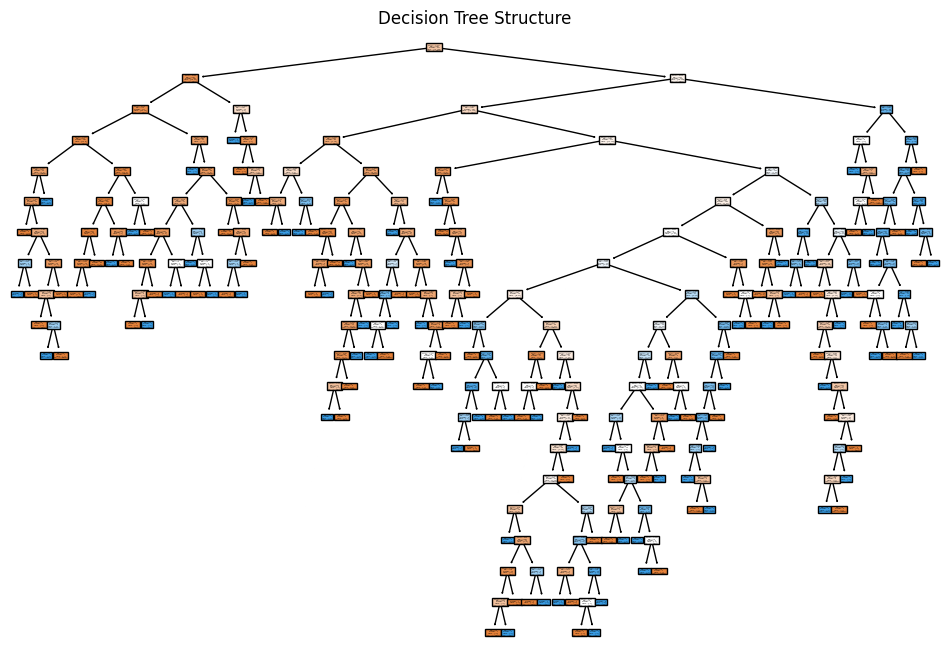

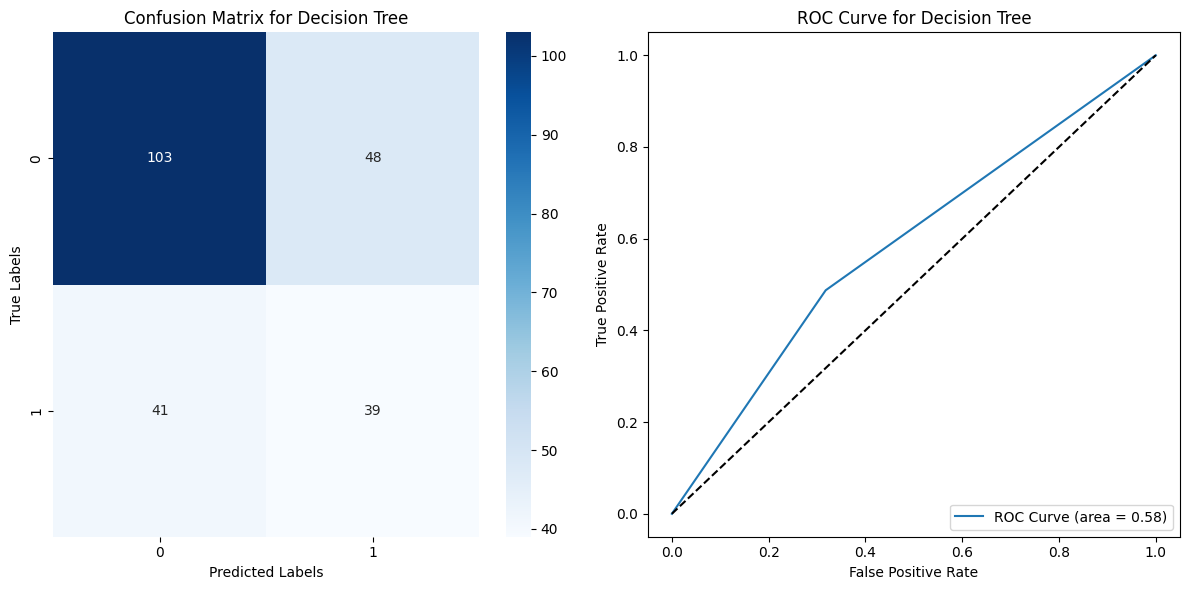

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       151
           1       0.45      0.49      0.47        80

    accuracy                           0.61       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.61      0.62       231



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Veri setini yüklüyorum ve verilerimizin her bir kolonuna anlamlı isimler veriyorum, kafamızda netleşmesi için
dosya_yolu = 'veri-seti.txt'
data = pd.read_csv(dosya_yolu, delimiter="\t", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Kontrol için ilk 10 veriyi göstermesini sağlıyoruz..
#"Outcome" sütunu, kişinin diyabet hastası olup olmadığını gösteriyor. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.
ilk_on_veriyi_göster = data.head(10)
ilk_on_veriyi_göster

# Veri normalizasyonu, makine öğrenimi ve veri analizi süreçlerinde genellikle veri ölçeklerinin standartlaştırılması için kullanılır.
# İki popüler normalizasyon yöntemi vardır, Min-Max ölçekleme ve Z-Skoru normalizasyonu (Standartlaştırma).
# Min-Max ölçekleme yöntemini kullanarak veri setinizdeki tüm sayısal sütunları normalizasyon işleminden geçireceğim.
# Bu işlemi gerçekleştirmek için MinMaxScaler fonksiyonunu sklearn.preprocessing kütüphanesinden kullanacağız.

# Normalizasyon için scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sayısal sütunları seçme ve ölçekleme
scaled_data = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Ölçeklenmiş verileri DataFrame'e dönüştürme ve başlıkları atama
scaled_df = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Outcome sütununu sonuca ekleyerek tam bir DataFrame oluşturma
scaled_df['Outcome'] = data['Outcome']
# İlk 10 ölçeklenmiş veriyi gösterme
scaled_df.head(10)

# PCA modelini başlatma ve ilk iki ana bileşeni hesaplama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df.drop('Outcome', axis=1))

# LDA modelini başlatma ve tek ayrımcı bileşeni hesaplama
lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = lda.fit_transform(scaled_df.drop('Outcome', axis=1), scaled_df['Outcome'])

# PCA ve LDA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
lda_df = pd.DataFrame(lda_data, columns=['LDA1'])

# PCA'nın öz değerleri
pca_eigenvalues = pca.explained_variance_
# LDA'nın öz değeri
lda_eigenvalue = lda.explained_variance_ratio_
(pca_eigenvalues, lda_eigenvalue)

# PCA ve LDA sonuçlarını daha anlamlı hale getirmek için hangi özniteliklerin bu iki yöntem için en ayırt edici olduğunu belirlemek önemlidir.
# Bu, her iki yöntemin yükleme skorlarını (PCA) ve katsayılarını (LDA) inceleyerek yapılabilir.

# PCA yüklerini (loadings) hesaplama
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# LDA katsayılarını hesaplama
lda_coefficients = lda.coef_

# PCA yüklerini ve LDA katsayılarını DataFrame'e dönüştürme
feature_names = scaled_df.drop('Outcome', axis=1).columns
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PCA1', 'PCA2'], index=feature_names)
lda_coefficients_df = pd.DataFrame(lda_coefficients.T, columns=['LDA1'], index=feature_names)

# PCA ve LDA özelliklerinin etkinliği
pca_loadings_df, lda_coefficients_df

# Veri setini %70 eğitim ve %30 test olarak tekrar ayırma
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    pca_features_df, scaled_df['Outcome'], test_size=0.30, random_state=42)

# Karar Ağacı modeli kurma
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_dt, y_train_dt)

# Test kümesi için tahminler yapma
y_pred_dt = decision_tree_model.predict(X_test_dt)
y_pred_proba_dt = decision_tree_model.predict_proba(X_test_dt)[:, 1]

# Performans metriklerini hesaplama
confusion_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
report_dt = classification_report(y_test_dt, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_dt, y_pred_proba_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_pred_proba_dt)

# Karar Ağacını çizme
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=['PCA1', 'PCA2'], class_names=['Non-Diabetic', 'Diabetic'])
plt.title('Decision Tree Structure')
plt.show()

# Konfuzyon matrisi ve ROC eğrisi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix for Decision Tree')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

ax[1].plot(fpr_dt, tpr_dt, label=f'ROC Curve (area = {roc_auc_dt:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_title('ROC Curve for Decision Tree')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Metrik raporu
print(report_dt)



Karar Ağacı Modeli ve Performans Metrikleri
Karar ağacı modelinin ağaç yapısı çizilmiştir. Bu yapıda her düğüm bir karar verme noktasını, her yaprak ise bir sınıf etiketini temsil eder.

Performans Metrikleri:
Konfuzyon Matrisi: Modelin gerçek pozitifler, gerçek negatifler, yanlış pozitifler ve yanlış negatifler olarak performansını gösterir.
ROC Eğrisi ve AUC: Modelin sınıflandırma performansının gücünü gösterir. AUC değeri 0.58, modelin orta seviyede performans gösterdiğini belirtir.
Sınıflandırma Raporu:
Precision (Kesinlik): Pozitif olarak tahmin edilenler içinde ne kadarının gerçekten pozitif olduğudur.
Recall (Hassasiyet/Duyarlılık): Gerçek pozitiflerin ne kadarının doğru tahmin edildiğidir.
F1-Score: Precision ve recall'un harmonik ortalamasıdır ve modelin genel doğruluğunu belirler.


Karar Ağacı Yapısı: Modelin nasıl karar verdiğini gösteren ağaç yapısı.
Konfuzyon Matrisi: Tahminlerin doğruluğunu sayısal olarak gösterir.
ROC Eğrisi: Modelin farklı eşiklerdeki performansını değerlendirir, ideal eğri (1,0) noktasına ne kadar yakınsa o kadar iyidir.
Sonuç:
Karar ağacı modeli %61 doğruluk ile sınıflandırma yapmıştır. Modelin duyarlılığı ve özgüllüğü dengeli bir şekilde dağılmış, ancak kesinlik ve hassasiyet oranları idealin altındadır. Bu, modelin bazı durumlar için yanlış pozitif ve yanlış negatif tahminler yapabildiğini gösterir. Bu sonuçlar, modelin karmaşıklığını azaltarak veya parametrelerini ayarlayarak iyileştirilebilir.


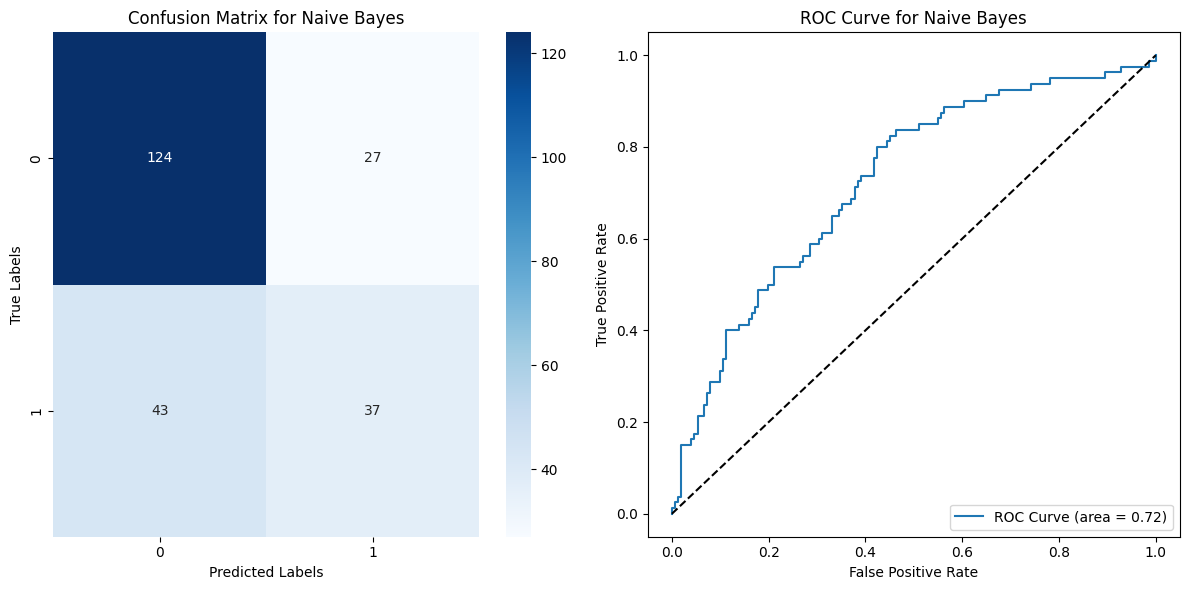

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       151
           1       0.58      0.46      0.51        80

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231



In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Veri setini yüklüyorum ve verilerimizin her bir kolonuna anlamlı isimler veriyorum, kafamızda netleşmesi için
dosya_yolu = 'veri-seti.txt'
data = pd.read_csv(dosya_yolu, delimiter="\t", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Kontrol için ilk 10 veriyi göstermesini sağlıyoruz..
#"Outcome" sütunu, kişinin diyabet hastası olup olmadığını gösteriyor. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.
ilk_on_veriyi_göster = data.head(10)
ilk_on_veriyi_göster

# Veri normalizasyonu, makine öğrenimi ve veri analizi süreçlerinde genellikle veri ölçeklerinin standartlaştırılması için kullanılır.
# İki popüler normalizasyon yöntemi vardır, Min-Max ölçekleme ve Z-Skoru normalizasyonu (Standartlaştırma).
# Min-Max ölçekleme yöntemini kullanarak veri setinizdeki tüm sayısal sütunları normalizasyon işleminden geçireceğim.
# Bu işlemi gerçekleştirmek için MinMaxScaler fonksiyonunu sklearn.preprocessing kütüphanesinden kullanacağız.

# Normalizasyon için scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sayısal sütunları seçme ve ölçekleme
scaled_data = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Ölçeklenmiş verileri DataFrame'e dönüştürme ve başlıkları atama
scaled_df = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Outcome sütununu sonuca ekleyerek tam bir DataFrame oluşturma
scaled_df['Outcome'] = data['Outcome']
# İlk 10 ölçeklenmiş veriyi gösterme
scaled_df.head(10)

# PCA modelini başlatma ve ilk iki ana bileşeni hesaplama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df.drop('Outcome', axis=1))

# LDA modelini başlatma ve tek ayrımcı bileşeni hesaplama
lda = LinearDiscriminantAnalysis(n_components=1)
lda_data = lda.fit_transform(scaled_df.drop('Outcome', axis=1), scaled_df['Outcome'])

# PCA ve LDA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
lda_df = pd.DataFrame(lda_data, columns=['LDA1'])


# PCA'nın öz değerleri
pca_eigenvalues = pca.explained_variance_
# LDA'nın öz değeri
lda_eigenvalue = lda.explained_variance_ratio_
(pca_eigenvalues, lda_eigenvalue)

# PCA ve LDA sonuçlarını daha anlamlı hale getirmek için hangi özniteliklerin bu iki yöntem için en ayırt edici olduğunu belirlemek önemlidir.
# Bu, her iki yöntemin yükleme skorlarını (PCA) ve katsayılarını (LDA) inceleyerek yapılabilir.

# PCA yüklerini (loadings) hesaplama
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# LDA katsayılarını hesaplama
lda_coefficients = lda.coef_

# PCA yüklerini ve LDA katsayılarını DataFrame'e dönüştürme
feature_names = scaled_df.drop('Outcome', axis=1).columns
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PCA1', 'PCA2'], index=feature_names)
lda_coefficients_df = pd.DataFrame(lda_coefficients.T, columns=['LDA1'], index=feature_names)

# Veri setini %70 eğitim ve %30 test olarak tekrar ayırma
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    pca_features_df, scaled_df['Outcome'], test_size=0.30, random_state=42)

# Naive Bayes modeli kurma
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_nb, y_train_nb)

# Test kümesi için tahminler yapma
y_pred_nb = naive_bayes_model.predict(X_test_nb)
y_pred_proba_nb = naive_bayes_model.predict_proba(X_test_nb)[:, 1]

# Performans metriklerini hesaplama
confusion_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)
report_nb = classification_report(y_test_nb, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_nb, y_pred_proba_nb)

# Konfuzyon matrisi ve ROC eğrisi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix for Naive Bayes')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

ax[1].plot(fpr_nb, tpr_nb, label=f'ROC Curve (area = {roc_auc_nb:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_title('ROC Curve for Naive Bayes')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Metrik raporu
print(report_nb)




Naive Bayes Sınıflandırıcısı Sonuçları ve Performans Metrikleri
Performans Metrikleri:

Konfuzyon Matrisi: Modelin gerçek pozitifler, gerçek negatifler, yanlış pozitifler ve yanlış negatifler olarak performansını gösterir.
ROC Eğrisi ve AUC: Modelin sınıflandırma performansının gücünü gösterir. AUC değeri 0.70, modelin ortalama üstü bir performans gösterdiğini belirtir.

Sınıflandırma Raporu:
Precision (Kesinlik): Pozitif olarak tahmin edilenler içinde ne kadarının gerçekten pozitif olduğudur.

Recall (Hassasiyet/Duyarlılık): Gerçek pozitiflerin ne kadarının doğru tahmin edildiğidir.

F1-Score: Precision ve recall'un harmonik ortalamasıdır ve modelin genel doğruluğunu belirler.

Grafikler:
Konfuzyon Matrisi: Tahminlerin doğruluğunu sayısal olarak gösterir.
ROC Eğrisi: Modelin farklı eşiklerdeki performansını değerlendirir, ideal eğri (1,0) noktasına ne kadar yakınsa o kadar iyidir.

Sonuç:
Naive Bayes modeli %70 doğruluk ile sınıflandırma yapmıştır. Modelin duyarlılığı ve özgüllüğü dengeli bir şekilde dağılmış, kesinlik ve hassasiyet oranları nispeten iyi seviyededir. Bu sonuçlar, Naive Bayes sınıflandırıcısının PCA ile dönüştürülen bu veri seti üzerinde etkili bir şekilde çalıştığını göstermektedir.
